#### Hamiltonian

hVω/2 * cos(ωt) * σx 

#### Unitary evolution

cos(V/2 sin(ωT)) σI + i sin(V/2 sin(ωT)) σx

#### Final state

α᾽ = cos(V/2 sin(ωT)) α + i sin(V/2 sin(ωT)) β 

β᾽ = i sin(V/2 sin(ωT)) α + cos(V/2 sin(ωT)) β

For initialisation in 0:

|α(T)|^2 = cos^2 (V/2 sin(ωT))

|β(T)|^2 = sin^2 (V/2 sin(ωT))

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def phi(V, omega, T):
    return (V / 2) * np.sin(omega * T)

def a(V, omega, T):
    return np.cos(phi(V, omega, T)) ** 2

def b(V, omega, T):
    return np.sin(phi(V, omega, T)) ** 2

In [10]:
T = np.arange(1000) / 100
V = 4
omega = 2

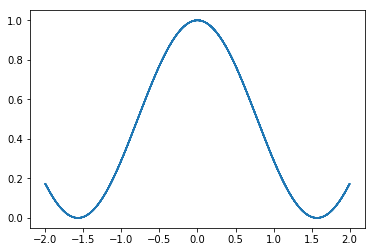

In [12]:
plt.plot(phi(V, omega, T), a(V, omega, T))
plt.show()

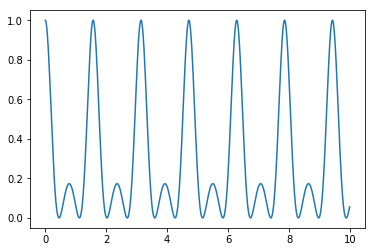

In [13]:
plt.plot(T, a(V, omega, T))
plt.show()

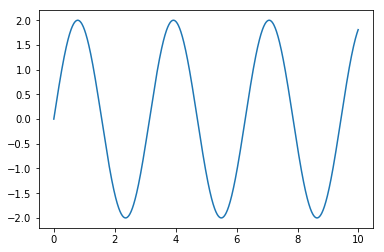

In [14]:
plt.plot(T, phi(V, omega, T))
plt.show()

### General functions

In [19]:
np.conj(1+1j)*(1+1j)

(2+0j)

In [82]:
def z_projection(x):
    if len(x.shape) == 1:
        return (np.conj(x[0])*x[0] - np.conj(x[1])*x[1]).real
    else:
        return np.array([np.conj(m[0])*m[0] - np.conj(m[1])*m[1] for m in x]).real

def x_projection(x):
    if len(x.shape) == 1:
        return (np.conj(x[0])*x[1] + np.conj(x[1])*x[0]).real
    else:
        return np.array([np.conj(m[0])*m[1] + np.conj(m[1])*m[0] for m in x]).real

def y_projection(x):
    if len(x.shape) == 1:
        return (-1j(np.conj(x[0])*x[1] - np.conj(x[1])*x[0])).real
    else:
        return np.array([-1j*(np.conj(m[0])*m[1] - np.conj(m[1])*m[0]) for m in x]).real

In [47]:
len(m[0].shape)

1

In [75]:
m

array([[ 1.00000000+0.j        ,  0.00000000+0.j        ],
       [ 0.99843791-0.02498698j,  0.00000000-0.04997396j],
       [ 0.99375651-0.0498959j ,  0.00000000-0.0997918j ],
       [ 0.98597043-0.07464893j,  0.00000000-0.14929786j],
       [ 0.97510399-0.09916875j,  0.00000000-0.1983375j ],
       [ 0.96119115-0.12337874j,  0.00000000-0.24675748j],
       [ 0.94427537-0.14720328j,  0.00000000-0.29440656j],
       [ 0.92440950-0.17056792j,  0.00000000-0.34113585j],
       [ 0.90165560-0.19339968j,  0.00000000-0.38679937j],
       [ 0.87608475-0.21562723j,  0.00000000-0.43125445j]])

In [83]:
y_projection(m)

array([ 0.        , -0.0997918 , -0.1983375 , -0.29440656, -0.38679937,
       -0.47436222, -0.55600172, -0.63069843, -0.69751963, -0.7556309 ])

In [87]:
def plot(t, x):
    fig = plt.figure(figsize=(10, 8))

    ax1 = fig.add_subplot(511)
    ax2 = fig.add_subplot(512)
    ax3 = fig.add_subplot(513)
    ax4 = fig.add_subplot(514)
    ax5 = fig.add_subplot(515)
    ax1.set_title('alpha')
    ax1.set_ylim([-1.1, 1.1])
    ax2.set_title('beta')
    ax2.set_ylim([-1.1, 1.1])
    ax3.set_title('x projection')
    ax3.set_ylim([-1.1, 1.1])
    ax4.set_title('y projection')
    ax4.set_ylim([-1.1, 1.1])
    ax5.set_title('z projection')
    ax5.set_ylim([-1.1, 1.1])


    ax1.plot(t, x[:, 0].real, lw=2, color='#e1cb66', label='real')
    ax1.plot(t, x[:, 0].imag, lw=2, color='#FF4500', label='imaginary')
    ax2.plot(t, x[:, 1].real, lw=2, color='#008B45', label='real')
    ax2.plot(t, x[:, 1].imag, lw=2, color='#FF8C00', label='imaginary')

    ax3.plot(t, x_projection(x), lw=2, color='#6689e1')
    ax4.plot(t, y_projection(x), lw=2, color='#6A5ACD')
    ax5.plot(t, z_projection(x), lw=2, color='#009FFF')
    
#     ax3.plot(t, np.absolute(x[:, 0])**2, lw=2, color='#6689e1')
#     ax4.plot(t, np.absolute(x[:, 1])**2, lw=2, color='#6A5ACD')

    ax1.legend(loc='upper right', fontsize=10)
    ax2.legend(loc='upper right', fontsize=10)
    ax1.set_xlabel('t')
    ax2.set_xlabel('t')
    ax3.set_xlabel('t')
    ax4.set_xlabel('t')
    ax4.set_xlabel('t')

    plt.tight_layout()
    return fig

### Exact Unitary solutions

In [22]:
def u_3(t, x, V=1, d=0):
    omega = np.sqrt(d**2 + V**2)
    a = (np.cos(omega*t/2) - 1j*(d/omega)*np.sin(omega*t/2))*x[0] - 1j*(V/omega)*np.sin(omega*t/2)*x[1]
    b = - 1j*(V/omega)*np.sin(omega*t/2)*x[0] + (np.cos(omega*t/2) + 1j*(d/omega)*np.sin(omega*t/2))*x[1]    
    return np.array([a, b], dtype=np.complex)

def u_4(t, x, V=2, d=0, omega_f=1):
    beta = np.sqrt((d*t)**2 + (V/omega_f*np.sin(omega_f*t))**2)
    a = (np.cos(beta/2) - 1j*(d*t/beta)*np.sin(beta/2))*x[0] + 1j*(V/omega_f)/beta*np.sin(omega_f*t)*np.sin(beta/2)*x[1]
    b = 1j*(V/omega_f)/beta*np.sin(omega_f*t)*np.sin(beta/2)*x[0] + (np.cos(beta/2) + 1j*d*t/beta*np.sin(beta/2))*x[1]
    return np.array([a, b], dtype=np.complex)

In [23]:
def unitary_evolution(x0, unitary, step, time, **kwargs):
    points = int(time/step + 1)
    x = np.zeros((points, 2), dtype=np.complex) + x0
    t = np.linspace(0, time, points)
    x = np.transpose(unitary(t, x0, **kwargs))
    return t, x

/Users/natalie/.pyenv/versions/3.5.2/envs/test/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


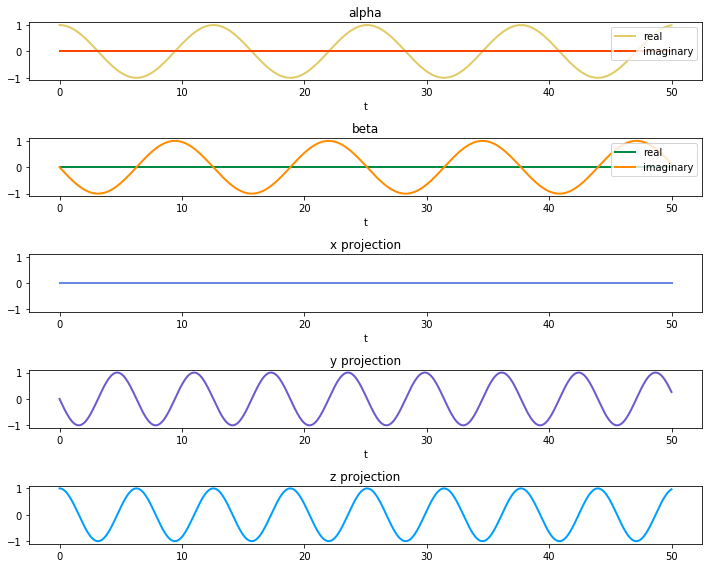

In [104]:
t, x = unitary_evolution([1, 0], u_3, 0.1, 50, V=1, d=0)
plot(t, x)

/Users/natalie/.pyenv/versions/3.5.2/envs/test/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/natalie/.pyenv/versions/3.5.2/envs/test/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/natalie/.pyenv/versions/3.5.2/envs/test/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/Users/natalie/.pyenv/versions/3.5.2/envs/test/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/natalie/.pyenv/versions/3.5.2/envs/test/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/natalie/.pye

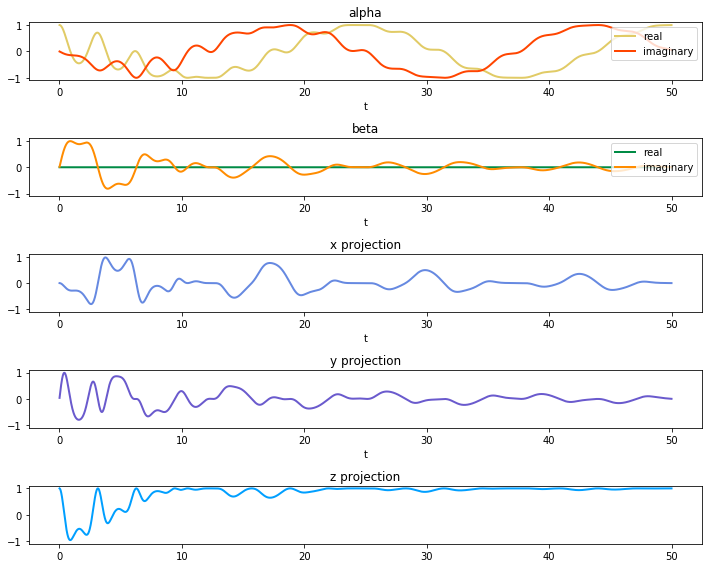

In [99]:
t, x = unitary_evolution([1, 0], u_4, 0.01, 50, V=4, d=0.5, omega_f=1)
plot(t, x)

### Runge Kutta

In [106]:
def h_3(t, x, V=1, d=0):
    return 0.5 * np.array([(d*x[0] + V*x[1]), (V*x[0] - d*x[1])], dtype=np.complex)

def h_4(t, x, V=1, d=0, omega_f=0):
    return 0.5 * np.array([(d*x[0] + V*np.cos(omega_f*t)*x[1]), (V*np.cos(omega_f*t)*x[0] - d*x[1])])

In [101]:
def rK4(x0, hadamard, step, time, **kwargs):
    k1 = []
    k2 = []
    k3 = []
    k4 = []
    xk = []
    points = int(time/step + 1)
    x = np.zeros((points, 2), dtype=np.complex)
    t = np.zeros(points)
    x[0] = x0
    t[0] = 0
    for i in range(1, points):
        k1 = -1j * hadamard(t[i-1], x[i-1], **kwargs)
        k2 = -1j * hadamard(t[i-1], x[i-1]+(step/2)*k1, **kwargs)
        k3 = -1j * hadamard(t[i-1], x[i-1]+(step/2)*k2, **kwargs)
        k4 = -1j * hadamard(t[i-1], x[i-1]+step*k3, **kwargs)
        x[i] = x[i-1] + (step/6) * (k1 + 2*k2 + 2*k3 + k4)
        t[i] = t[i-1] + step
    return t, x 

/Users/natalie/.pyenv/versions/3.5.2/envs/test/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


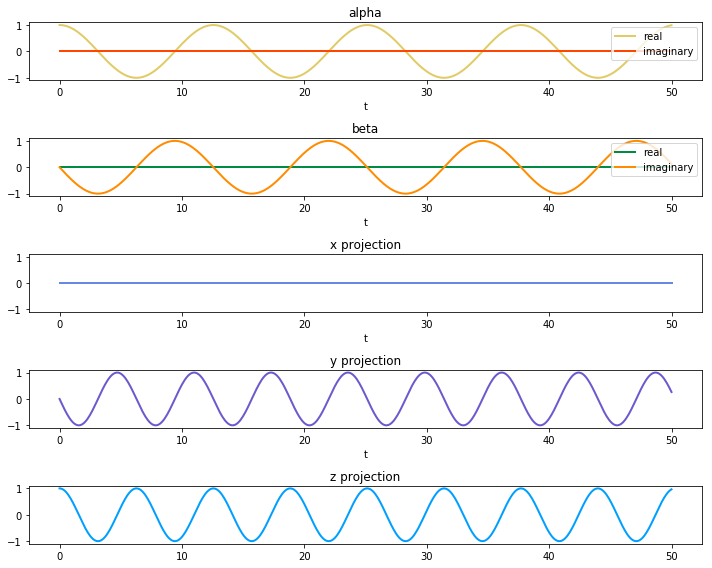

In [103]:
t, x = rK4([1, 0], h_3, 0.1, 50, V=1, d=0)
plot(t, x)

/Users/natalie/.pyenv/versions/3.5.2/envs/test/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


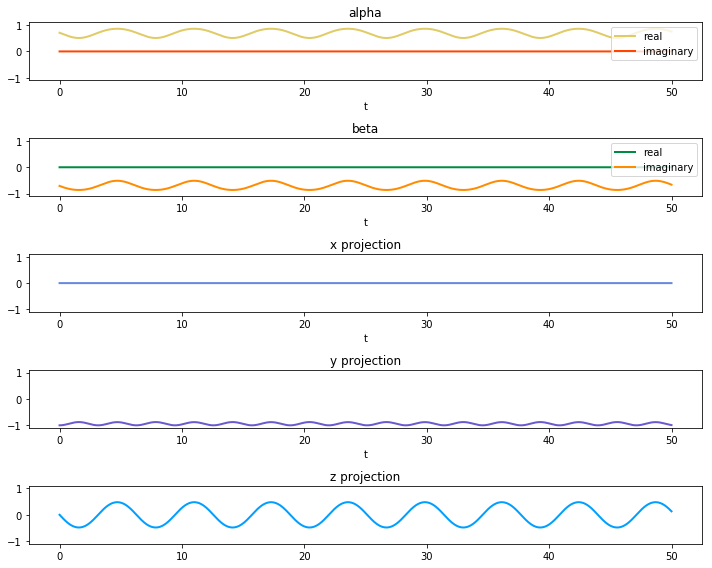

In [134]:
t, x = rK4([np.sqrt(1/2), -1j*np.sqrt(1/2)], h_4, 0.01, 50, V=0.5, d=0, omega_f=1)
plot(t, x)